In [1]:
from ITC_ophyd import MercuryITCDevice

In [2]:
LTDLC = MercuryITCDevice(prefix="...",name="ITCD", host="itc-optistat.psi.ch")
# LTDLC.stage()
# print(LTDLC.read())

# print(LTDLC.get())
# print(LTDLC.describe())


connecting to itc-optistat.psi.ch


In [3]:
print(LTDLC.read())

OrderedDict([('ITCD_heater_power', {'value': 'N/A', 'timestamp': 1686148982.9189959}), ('ITCD_temperature', {'value': 819.73, 'timestamp': 1686148982.9189959})])


In [4]:
LTDLC.summary()

data keys (* hints)
-------------------
*ITCD_heater_power
*ITCD_temperature

read attrs
----------
heater_power         ITCHeaterPower      ('ITCD_heater_power')
temperature          ITCTemperature      ('ITCD_temperature')

config keys
-----------

configuration attrs
-------------------

unused attrs
------------



In [5]:
from bluesky import RunEngine
from bluesky.plans import count
from bluesky.callbacks.best_effort import BestEffortCallback
RE = RunEngine({})
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)
from databroker import Broker
import databroker
# db = Broker.named('temp')
from databroker import temp
catalog = temp()
# Insert all metadata/data captured into db.
# RE.subscribe(db.insert)
# catalog = databroker.catalog['CATALOG_PSI_IR']
RE.subscribe(catalog.v1.insert)


1



Transient Scan ID: 1     Time: 2023-06-07 16:43:10
Persistent Unique Scan ID: '9bd7a3f1-f3c4-49ee-9f80-dc73721245d4'
New stream: 'primary'


C:\Users\shen_t2\AppData\Roaming\Python\Python39\site-packages\bluesky\callbacks\best_effort.py:242: UserWarning: Omitting ITCD_heater_power from plot because dtype is string
  warn("Omitting {} from plot because dtype is {}"


+-----------+------------+-------------------+------------------+
|   seq_num |       time | ITCD_heater_power | ITCD_temperature |
+-----------+------------+-------------------+------------------+
|         1 | 16:43:10.6 |               N/A |          819.730 |
|         2 | 16:43:11.4 |               N/A |          819.730 |
|         3 | 16:43:12.4 |               N/A |          819.730 |
|         4 | 16:43:13.4 |               N/A |          819.730 |
|         5 | 16:43:14.4 |               N/A |          819.730 |
+-----------+------------+-------------------+------------------+
generator count ['9bd7a3f1'] (scan num: 1)





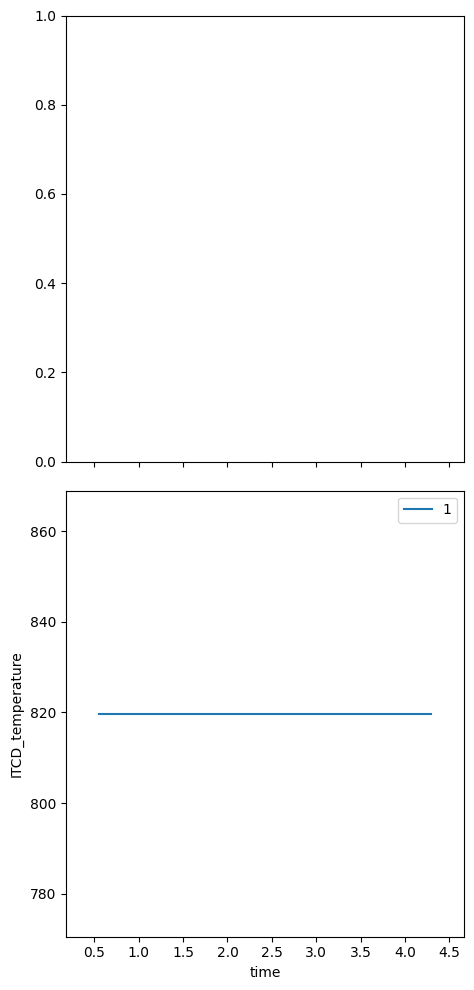

In [6]:
# from functools import partial
# laser_count = partial(count, [LTDLC])
# countDLC, = RE(laser_count(num=5,delay=1))
# from bluesky.callbacks.mpl_plotting import LivePlot

countDLC, = RE(count([LTDLC],num=5,delay=1))
# countDLC, = RE(count([LTDLC],num=5,delay=1, LivePlot('LTDLC_scan_end', 'LTDLC_scan_start')))

In [7]:
header = catalog[countDLC]

In [8]:
list(header)

['start', 'descriptors', 'stop', 'ext']

In [10]:
ds = header.primary.read()

In [12]:
ds.head()

[{'run_start': '9bd7a3f1-f3c4-49ee-9f80-dc73721245d4',
  'time': 1686148990.4006922,
  'data_keys': {'ITCD_heater_power': {'source': 'MercuryITC',
    'dtype': 'string',
    'shape': [],
    'object_name': 'ITCD'},
   'ITCD_temperature': {'source': 'MercuryITC',
    'dtype': 'number',
    'shape': [],
    'object_name': 'ITCD'}},
  'uid': '061cfc14-5be0-4b59-ba64-d693440e1dc9',
  'configuration': {'ITCD': {'data': {}, 'timestamps': {}, 'data_keys': {}}},
  'name': 'primary',
  'hints': {'ITCD': {'fields': ['ITCD_heater_power', 'ITCD_temperature']}},
  'object_keys': {'ITCD': ['ITCD_heater_power', 'ITCD_temperature']}}]

In [18]:
LTDLC.unstage()

[LaserToptica(prefix='...', name='LTDLC', read_attrs=['scan_end', 'scan_start', 'scan_offset', 'scan_frequency', 'ctl_wavelength_act'], configuration_attrs=[])]